# House Rent Prediction from Kadıköy
Bensu GAYRET - Kasım 2022

### Referanslar
- [House_Rent_Prediction|EDA|11_Models]([https://www.kaggle.com/code/nalinmahajan16/house-rent-prediction-eda-11-models])
- [BTK-Python Tensorflow- Atıl Samancıoğlu]([https://github.com/atilsamancioglu/BTK-PythonTensorflow/blob/master/30-TensorflowArabaAnalizi.ipynb])
- [Ev Kira Tahmini]([https://github.com/efeparlakk1/ev_kira_tahmini/blob/main/ev_kira__tahminleme/streamlit_app.py])

In [933]:
#Importing the Required Directories
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from random import seed
from random import randint
import sklearn
from IPython.display import display, HTML


In [869]:
#Accessing the Dataset
df=pd.read_csv("house_rent_prices_dataset.csv", encoding='utf8')

In [870]:
#Looking at the Dataset
df.head()

,Unnamed: 0,ilce,fiyat,m2_brut,bina_yasi,bulundugu_kat,kat_sayisi,isitma,banyo_sayisi,balkon,esyali,site_icerisinde,kimden,yaka,oda,salon,merkeze_yakin,aidat_aralik,luks_mu
0,0,Ümraniye,7000.0,45.0,0-5 arası,19,31,Yerden Isıtma,1,Yok,Evet,Evet,Emlak Ofisinden,Anadolu,1.0,0.0,Hayır,750 - 1000,Hayır
1,1,Ataşehir,17500.0,100.0,0-5 arası,15,27,Merkezi (Pay Ölçer),1,Yok,Hayır,Evet,Emlak Ofisinden,Anadolu,2.0,1.0,Hayır,300 - 500,Hayır
2,2,Ümraniye,8250.0,135.0,0-5 arası,3,14,Merkezi (Pay Ölçer),2,Yok,Hayır,Evet,Emlak Ofisinden,Anadolu,3.0,1.0,Evet,500 - 750,Hayır
3,3,Kartal,10000.0,120.0,0-5 arası,3,10,Doğalgaz (Kombi),2,Var,Hayır,Hayır,Emlak Ofisinden,Anadolu,3.0,1.0,Hayır,0 - 150,Hayır
4,4,Çekmeköy,6750.0,99.0,5-10 arası,4,5,Merkezi (Pay Ölçer),1,Var,Hayır,Evet,Emlak Ofisinden,Anadolu,2.0,1.0,Hayır,750 - 1000,Hayır


In [871]:
df.shape

(5472, 19)

In [872]:
#Accessing the columns of the Dataset
df.columns

Index(['Unnamed: 0', 'ilce', 'fiyat', 'm2_brut', 'bina_yasi', 'bulundugu_kat',
       'kat_sayisi', 'isitma', 'banyo_sayisi', 'balkon', 'esyali',
       'site_icerisinde', 'kimden', 'yaka', 'oda', 'salon', 'merkeze_yakin',
       'aidat_aralik', 'luks_mu'],
      dtype='object')

In [873]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5472 non-null   int64  
 1   ilce             5472 non-null   object 
 2   fiyat            5472 non-null   float64
 3   m2_brut          5472 non-null   float64
 4   bina_yasi        5472 non-null   object 
 5   bulundugu_kat    5472 non-null   int64  
 6   kat_sayisi       5472 non-null   int64  
 7   isitma           5472 non-null   object 
 8   banyo_sayisi     5472 non-null   int64  
 9   balkon           5472 non-null   object 
 10  esyali           5472 non-null   object 
 11  site_icerisinde  5472 non-null   object 
 12  kimden           5472 non-null   object 
 13  yaka             5472 non-null   object 
 14  oda              5472 non-null   float64
 15  salon            5472 non-null   float64
 16  merkeze_yakin    5472 non-null   object 
 17  aidat_aralik  

This dataset doesn't contain any Null values.

In [874]:
#Checking the Mean of the Rent
print('The Mean of the Rent is {}'.format(df['fiyat'].mean()))
print('The Standard Deviation of Rent is {}'.format(df['fiyat'].std()))

The Mean of the Rent is 7882.421783625731
The Standard Deviation of Rent is 4141.156658231768


In [875]:
# Find the count of unique values in the index
df.bina_yasi.value_counts()

0-5 arası      1846
5-10 arası     1271
11-15 arası     511
21-25 arası     503
31 ve üzeri     474
26-30 arası     464
16-20 arası     403
Name: bina_yasi, dtype: int64

In [876]:
#Replace data with integer for more meaningfull 
df['bina_yasi'] = df['bina_yasi'].replace(['0-5 arası'], 5) 

df['bina_yasi'] = df['bina_yasi'].replace(['5-10 arası'], 10)

df['bina_yasi'] = df['bina_yasi'].replace(['11-15 arası'], 15)

df['bina_yasi'] = df['bina_yasi'].replace(['16-20 arası'], 20)

df['bina_yasi'] = df['bina_yasi'].replace(['21-25 arası'], 25)

df['bina_yasi'] = df['bina_yasi'].replace(['26-30 arası'], 30)

df['bina_yasi'] = df['bina_yasi'].replace(['31 ve üzeri'], 35)

In [878]:
df.head()

,Unnamed: 0,ilce,fiyat,m2_brut,bina_yasi,bulundugu_kat,kat_sayisi,isitma,banyo_sayisi,balkon,esyali,site_icerisinde,kimden,yaka,oda,salon,merkeze_yakin,aidat_aralik,luks_mu
0,0,Ümraniye,7000.0,45.0,5,19,31,Yerden Isıtma,1,Yok,Evet,Evet,Emlak Ofisinden,Anadolu,1.0,0.0,Hayır,750 - 1000,Hayır
1,1,Ataşehir,17500.0,100.0,5,15,27,Merkezi (Pay Ölçer),1,Yok,Hayır,Evet,Emlak Ofisinden,Anadolu,2.0,1.0,Hayır,300 - 500,Hayır
2,2,Ümraniye,8250.0,135.0,5,3,14,Merkezi (Pay Ölçer),2,Yok,Hayır,Evet,Emlak Ofisinden,Anadolu,3.0,1.0,Evet,500 - 750,Hayır
3,3,Kartal,10000.0,120.0,5,3,10,Doğalgaz (Kombi),2,Var,Hayır,Hayır,Emlak Ofisinden,Anadolu,3.0,1.0,Hayır,0 - 150,Hayır
4,4,Çekmeköy,6750.0,99.0,10,4,5,Merkezi (Pay Ölçer),1,Var,Hayır,Evet,Emlak Ofisinden,Anadolu,2.0,1.0,Hayır,750 - 1000,Hayır


# EDA-Exploratory Data Analysis

In [879]:
df.describe()

,Unnamed: 0,fiyat,m2_brut,bina_yasi,bulundugu_kat,kat_sayisi,banyo_sayisi,oda,salon
count,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000
mean,2735.500000,7882.421784,107.844298,14.756944,4.131944,8.199196,1.281433,2.163925,0.986659
std,1579.774667,4141.156658,41.588323,10.210960,4.632752,6.741010,0.492791,0.874867,0.241100
min,0.000000,1000.000000,20.000000,5.000000,-1.000000,1.000000,1.000000,1.000000,0.000000
25%,1367.750000,4900.000000,80.000000,5.000000,1.000000,4.000000,1.000000,2.000000,1.000000
50%,2735.500000,6750.000000,100.000000,10.000000,3.000000,5.000000,1.000000,2.000000,1.000000
75%,4103.250000,10000.000000,130.000000,25.000000,5.000000,10.000000,2.000000,3.000000,1.000000
max,5471.000000,20000.000000,460.000000,35.000000,31.000000,31.000000,6.000000,7.000000,4.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fiyat', ylabel='Density'>

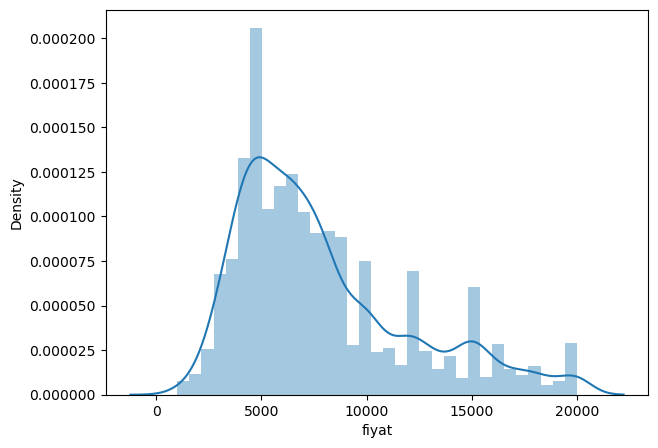

In [784]:
#Analyzing the Rent
plt.figure(figsize=(7,5))
sbn.distplot(df["fiyat"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bina_yasi', ylabel='count'>

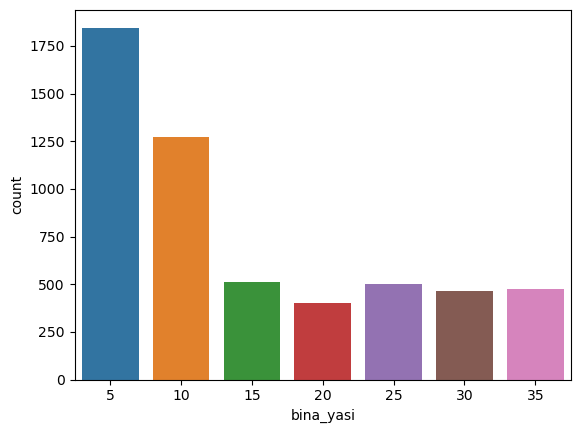

In [785]:
#Analyzing the Building Age
sbn.countplot(df["bina_yasi"])

In [786]:
df.groupby("merkeze_yakin").mean()["fiyat"]

merkeze_yakin
Evet     7016.035629
Hayır    7954.634924
Name: fiyat, dtype: float64

In [787]:
df.groupby("yaka").mean()["fiyat"]

yaka
Anadolu    7911.079263
Avrupa     7861.106756
Name: fiyat, dtype: float64

In [788]:
#Analyzing the Age of Building with Mean Rents 
df.groupby("bina_yasi").mean()["fiyat"]

bina_yasi
5     8104.201517
10    7784.949646
15    7462.129159
20    7483.369727
25    7319.580517
30    7810.969828
35    8739.662447
Name: fiyat, dtype: float64

<AxesSubplot:xlabel='oda', ylabel='fiyat'>

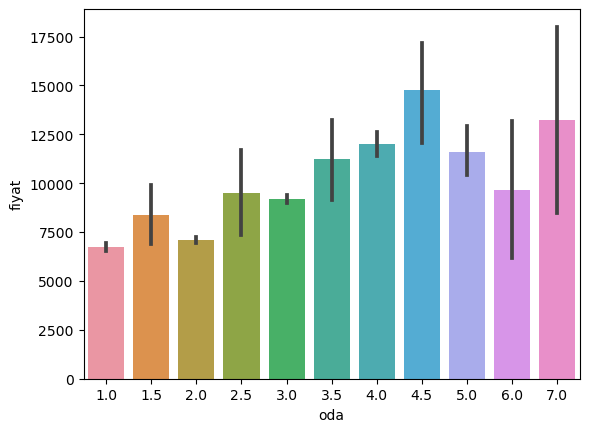

In [789]:
#Analyzing the Number of Rooms with Price 
sbn.barplot(x="oda",y="fiyat",data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bulundugu_kat', ylabel='count'>

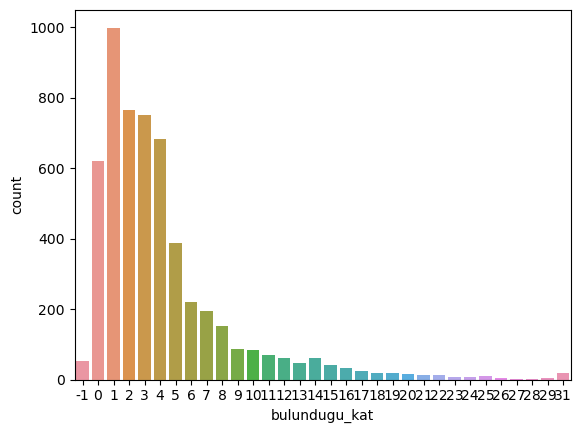

In [790]:
#Analyzing the Number of Rooms with Rent
sbn.countplot("bulundugu_kat",data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='banyo_sayisi', ylabel='count'>

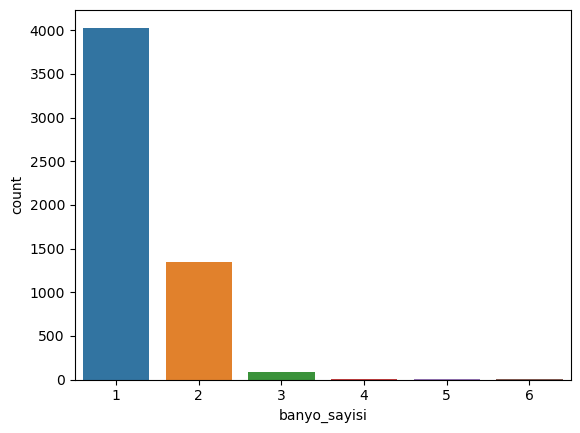

In [791]:
#Analyzing the Number of Rooms with Rent 
sbn.countplot(df.banyo_sayisi)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


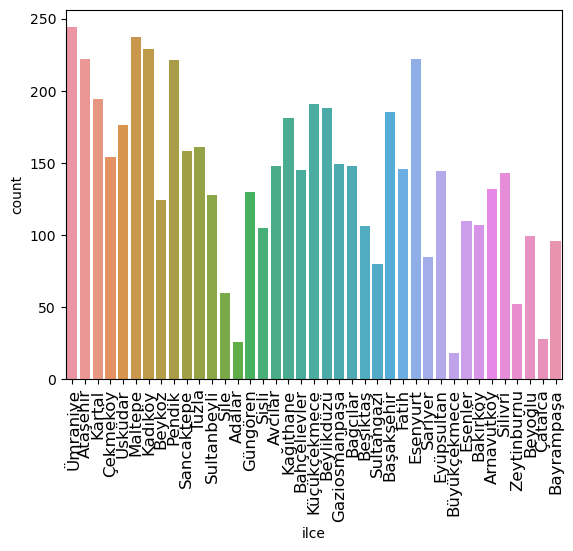

In [846]:
sbn.countplot(df.ilce)
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


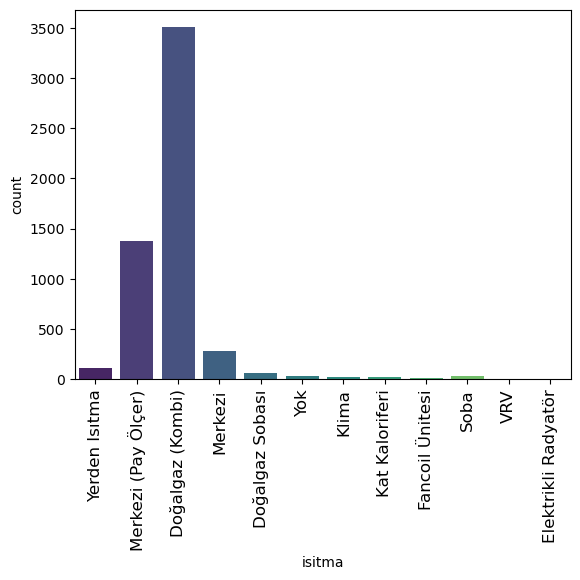

In [792]:
sbn.countplot(df.isitma,palette="viridis")
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.show()

In [793]:
#The most widely used heating device is "Doğalgaz (Kombi)"
df.groupby("isitma").mean()["fiyat"]

isitma
Doğalgaz (Kombi)        7252.687589
Doğalgaz Sobası         4474.150000
Elektrikli Radyatör     7375.000000
Fancoil Ünitesi         9481.818182
Kat Kaloriferi          7952.272727
Klima                   7574.000000
Merkezi                10049.116608
Merkezi (Pay Ölçer)     9163.165217
Soba                    3556.666667
VRV                     7250.000000
Yerden Isıtma           9958.991228
Yok                     5508.571429
Name: fiyat, dtype: float64

In [794]:
df.corr()["fiyat"].sort_values()

Unnamed: 0      -0.003358
bina_yasi        0.002246
salon            0.139263
bulundugu_kat    0.226051
kat_sayisi       0.248155
oda              0.313390
banyo_sayisi     0.382236
m2_brut          0.430317
fiyat            1.000000
Name: fiyat, dtype: float64

# Data Cleaning

In [795]:
#Decreasing Rent Values
df.sort_values("fiyat",ascending = False).head(5)

,Unnamed: 0,ilce,fiyat,m2_brut,bina_yasi,bulundugu_kat,kat_sayisi,isitma,banyo_sayisi,balkon,esyali,site_icerisinde,kimden,yaka,oda,salon,merkeze_yakin,aidat_aralik,luks_mu
4586,4586,Beşiktaş,20000.0,140.0,25,1,5,Merkezi,1,Var,Hayır,Evet,Emlak Ofisinden,Avrupa,3.0,1.0,Hayır,500 - 750,Hayır
5203,5203,Beylikdüzü,20000.0,230.0,5,3,5,Merkezi (Pay Ölçer),2,Var,Hayır,Evet,Emlak Ofisinden,Avrupa,4.0,1.0,Hayır,300 - 500,Evet
4918,4918,Gaziosmanpaşa,20000.0,350.0,5,5,20,Merkezi (Pay Ölçer),3,Var,Hayır,Evet,Sahibinden,Avrupa,4.5,1.0,Hayır,500 - 750,Hayır
1546,1546,Üsküdar,20000.0,117.0,10,5,16,Merkezi (Pay Ölçer),2,Var,Hayır,Evet,Emlak Ofisinden,Anadolu,2.0,1.0,Hayır,0 - 150,Hayır
285,285,Üsküdar,20000.0,190.0,5,4,5,Doğalgaz (Kombi),2,Var,Evet,Hayır,Emlak Ofisinden,Anadolu,3.0,1.0,Hayır,150 - 300,Hayır


In [796]:
#Ascending Rent Values
df.sort_values("fiyat",ascending = True).head(5)

,Unnamed: 0,ilce,fiyat,m2_brut,bina_yasi,bulundugu_kat,kat_sayisi,isitma,banyo_sayisi,balkon,esyali,site_icerisinde,kimden,yaka,oda,salon,merkeze_yakin,aidat_aralik,luks_mu
4635,4635,Bayrampaşa,1000.0,90.0,5,0,6,Doğalgaz (Kombi),1,Var,Hayır,Hayır,Sahibinden,Avrupa,2.0,1.0,Hayır,0 - 150,Hayır
3863,3863,Bayrampaşa,1000.0,90.0,5,0,6,Doğalgaz (Kombi),1,Var,Hayır,Hayır,Sahibinden,Avrupa,2.0,1.0,Hayır,0 - 150,Hayır
3064,3064,Silivri,1000.0,60.0,20,2,4,Doğalgaz (Kombi),1,Yok,Hayır,Hayır,Sahibinden,Avrupa,1.0,1.0,Hayır,150 - 300,Hayır
4574,4574,Bayrampaşa,1000.0,200.0,30,0,4,Doğalgaz (Kombi),1,Yok,Evet,Hayır,Sahibinden,Avrupa,2.5,1.0,Hayır,0 - 150,Hayır
2987,2987,Sarıyer,1000.0,25.0,10,0,2,Soba,1,Yok,Evet,Hayır,Emlak Ofisinden,Avrupa,1.0,0.0,Hayır,0 - 150,Hayır


<AxesSubplot:xlabel='ilce'>

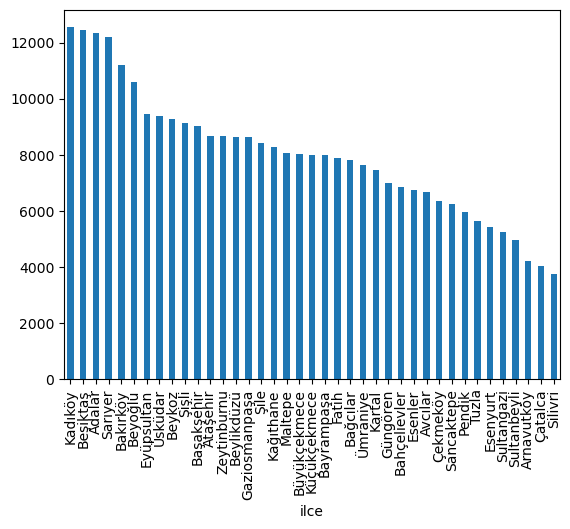

In [797]:
df.groupby("ilce")['fiyat'].mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='ilce'>

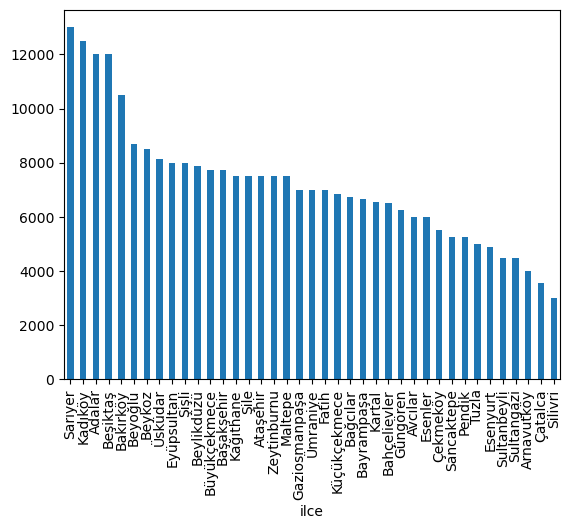

In [800]:
#Median
df.groupby("ilce")['fiyat'].median().sort_values(ascending=False).plot(kind='bar')

In [739]:
len(df) * 0.01

54.72

In [741]:
yuzdeDoksanDokuzDf = dataFrame.sort_values("fiyat",ascending = False).iloc[55:]

In [743]:
df = yuzdeDoksanDokuzDf

# Feature Engineering

In [880]:
#Converting the Categorical Variables into Numeric Form
df['balkon'] = df['bina_yasi'].replace(['Var'], 1) 
df['balkon'] = df['bina_yasi'].replace(['Yok'], 0)
df['esyali'] = df['bina_yasi'].replace(['Evet'], 1) 
df['esyali'] = df['bina_yasi'].replace(['Hayır'], 0)
df['site_icerisinde'] = df['bina_yasi'].replace(['Evet'], 1) 
df['site_icerisinde'] = df['bina_yasi'].replace(['Hayır'], 0)
df['merkeze_yakin'] = df['bina_yasi'].replace(['Evet'], 1) 
df['merkeze_yakin'] = df['bina_yasi'].replace(['Hayır'], 0)

In [881]:
df

,Unnamed: 0,ilce,fiyat,m2_brut,bina_yasi,bulundugu_kat,kat_sayisi,isitma,banyo_sayisi,balkon,esyali,site_icerisinde,kimden,yaka,oda,salon,merkeze_yakin,aidat_aralik,luks_mu
0,0,Ümraniye,7000.0,45.0,5,19,31,Yerden Isıtma,1,5,5,5,Emlak Ofisinden,Anadolu,1.0,0.0,5,750 - 1000,Hayır
1,1,Ataşehir,17500.0,100.0,5,15,27,Merkezi (Pay Ölçer),1,5,5,5,Emlak Ofisinden,Anadolu,2.0,1.0,5,300 - 500,Hayır
2,2,Ümraniye,8250.0,135.0,5,3,14,Merkezi (Pay Ölçer),2,5,5,5,Emlak Ofisinden,Anadolu,3.0,1.0,5,500 - 750,Hayır
3,3,Kartal,10000.0,120.0,5,3,10,Doğalgaz (Kombi),2,5,5,5,Emlak Ofisinden,Anadolu,3.0,1.0,5,0 - 150,Hayır
4,4,Çekmeköy,6750.0,99.0,10,4,5,Merkezi (Pay Ölçer),1,10,10,10,Emlak Ofisinden,Anadolu,2.0,1.0,10,750 - 1000,Hayır
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,5467,Sarıyer,5000.0,55.0,25,0,5,Doğalgaz (Kombi),1,25,25,25,Emlak Ofisinden,Avrupa,1.0,1.0,25,150 - 300,Hayır
5468,5468,Küçükçekmece,5600.0,100.0,10,3,3,Doğalgaz (Kombi),1,10,10,10,Emlak Ofisinden,Avrupa,3.0,1.0,10,0 - 150,Hayır
5469,5469,Silivri,2700.0,92.0,5,3,6,Merkezi (Pay Ölçer),1,5,5,5,Sahibinden,Avrupa,2.0,1.0,5,300 - 500,Hayır
5470,5470,Kağıthane,6000.0,75.0,5,1,5,Doğalgaz (Kombi),1,5,5,5,Sahibinden,Avrupa,2.0,1.0,5,0 - 150,Hayır


# Correlation

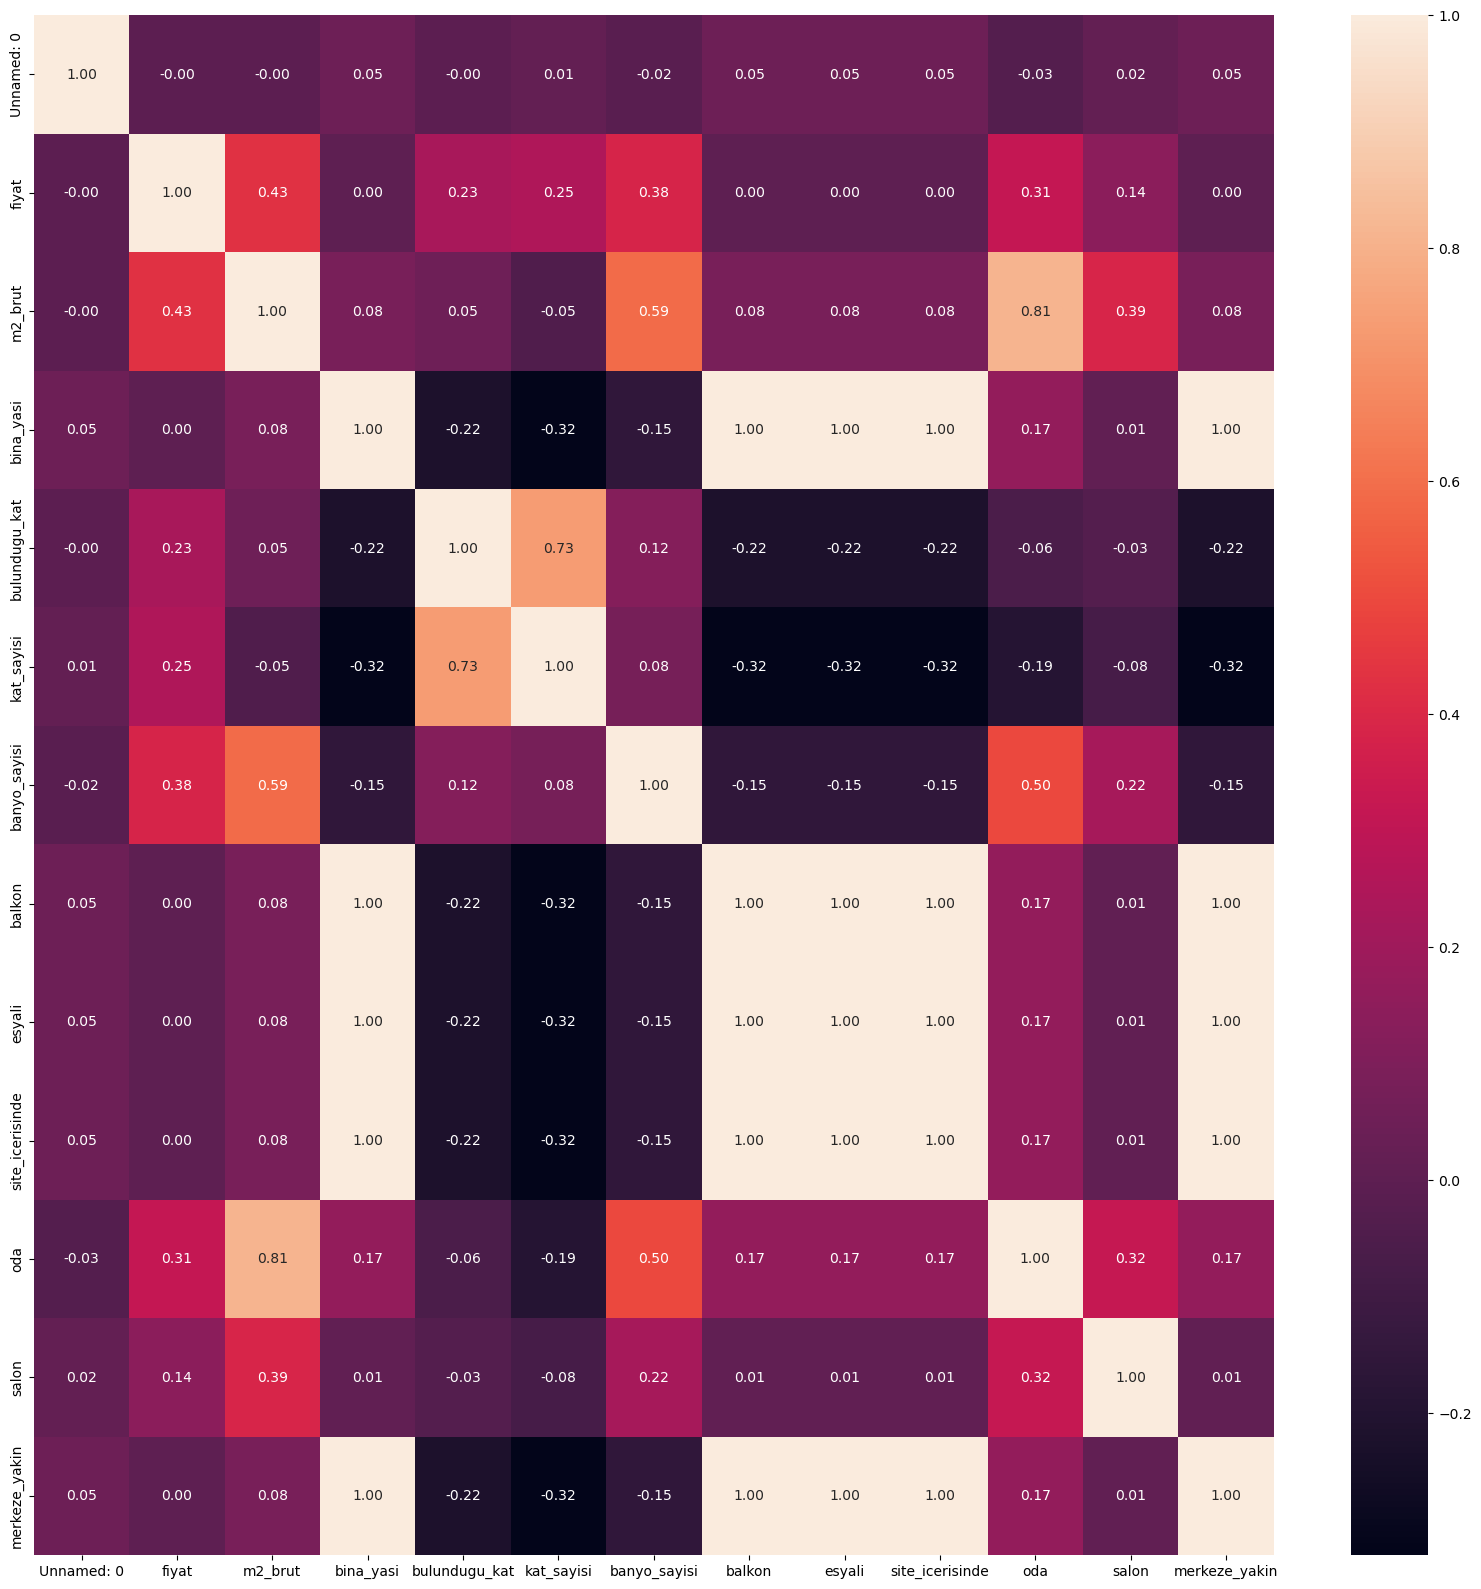

In [882]:
#Correlation between all Features
plt.figure(figsize=(20,20))
sbn.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

lets see some distrubitions.

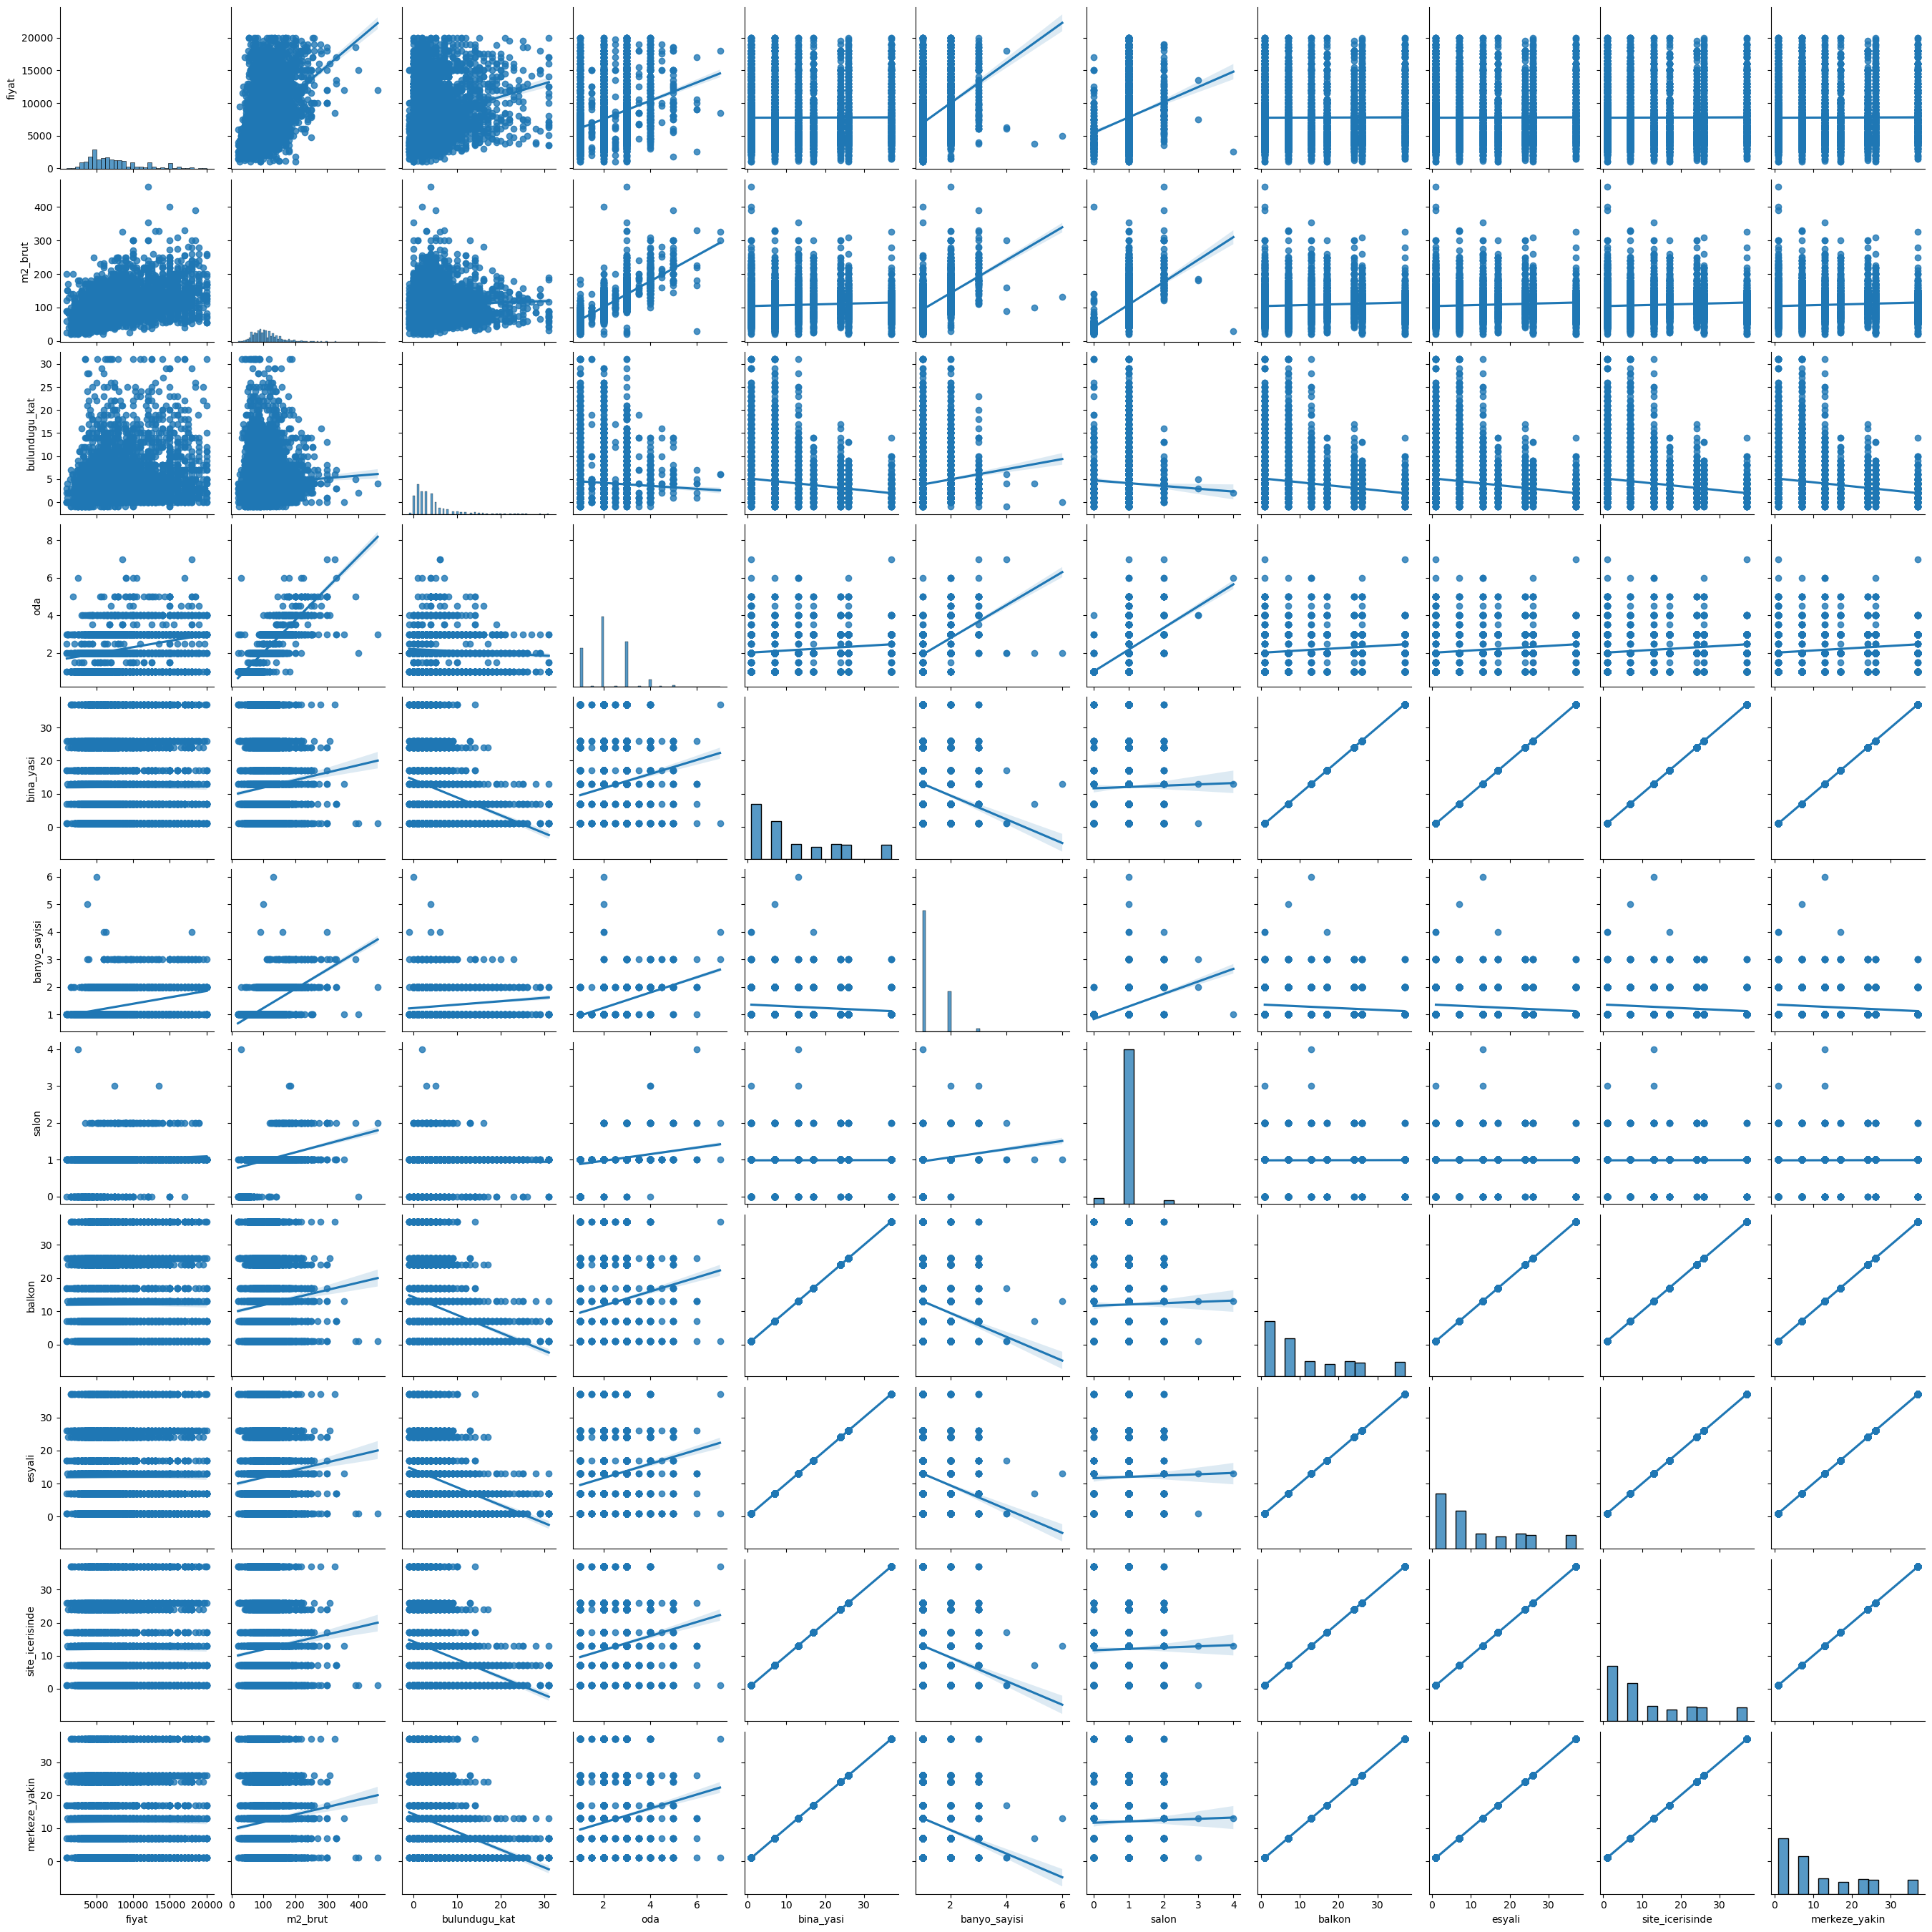

In [747]:
sbn.pairplot(df, kind="reg")

In [883]:
#Relation between Rent and area of the house(m2)
df =pd.DataFrame(df, columns=["ilce","fiyat","m2_brut","bulundugu_kat","oda","bina_yasi","banyo_sayisi","salon"])

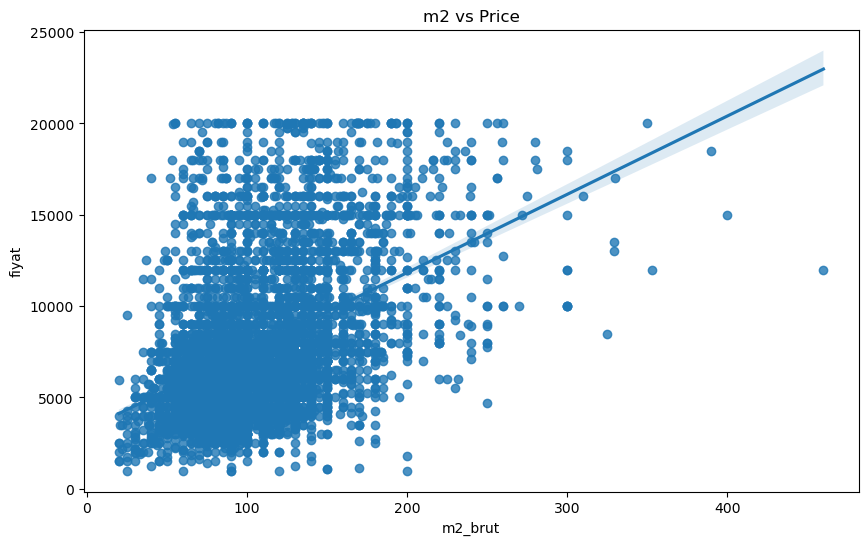

In [884]:
plt.figure(figsize=(10,6))
sbn.regplot(x='m2_brut', y='fiyat', data=df).set_title('m2 vs Price')
plt.savefig("m2.jpeg",dpi=300,bbox_inches="tight")

<AxesSubplot:>

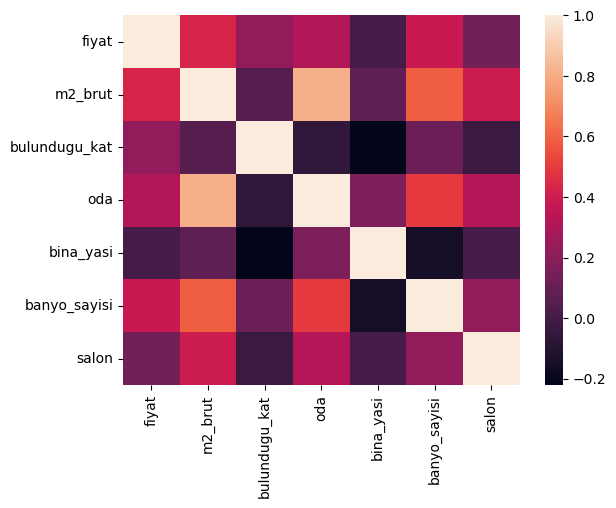

In [885]:
sbn.heatmap(df.corr())

A heatmap is a way to represent data in a 2D format. Data values are represented by colors on the chart. The purpose of the heatmap is to provide a colorful visual summary of the information.It can show the relationship between variables.

We can say that the relationship between the variables is more in light colors.

We can say that the features that affect the rent the most are m2 and the number of rooms.

<AxesSubplot:xlabel='oda', ylabel='fiyat'>

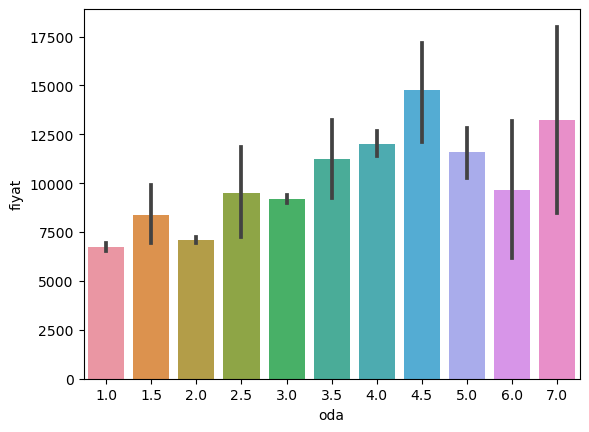

In [886]:
sbn.barplot(x = df['oda'], y = df['fiyat'], data = df)

It looks like houses that have 4,5 or 7 rooms are higher rent prices than 6 rooms

In [887]:
mean_size=df.groupby('oda')['m2_brut'].mean().sort_values()
print(mean_size)

oda
1.0     66.240784
1.5     86.166667
2.0     99.130901
2.5    122.551724
3.0    138.910547
3.5    169.647059
4.0    188.625532
6.0    191.666667
5.0    229.050000
4.5    231.700000
7.0    312.500000
Name: m2_brut, dtype: float64


6 room houses are not big as 4,5 and 7 room houses.

# Splitting of Train and Test Data

In [888]:
dataFrame =pd.DataFrame(df, columns=["fiyat","m2_brut","bulundugu_kat","oda","bina_yasi","banyo_sayisi","salon"])

In [889]:
y = dataFrame["fiyat"].values
x = dataFrame.drop("fiyat",axis=1).values

In [890]:
from sklearn.model_selection import train_test_split

In [891]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [892]:
len(x_train)

3830

In [893]:
len(x_test)

1642

In [894]:
from sklearn.preprocessing import MinMaxScaler

In [895]:
scaler = MinMaxScaler()

In [896]:
x_train = scaler.fit_transform(x_train)

In [897]:
x_test = scaler.transform(x_test)

# Modelling

In [951]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [952]:
x_train.shape

(3830, 6)

In [953]:
model = Sequential() #creating a model

model.add(Dense(12,activation="relu")) #creating layes
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1)) #output layer

model.compile(optimizer="adam",loss="mse") #mean square error 

In [954]:
model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=256,epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 14ms/step - loss: 78559304.0000 - val_loss: 80947904.0000
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 78555776.0000 - val_loss: 80943144.0000
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 78549480.0000 - val_loss: 80934416.0000
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 78537608.0000 - val_loss: 80917424.0000
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 78514320.0000 - val_loss: 80884344.0000
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 78468912.0000 - val_loss: 80817864.0000
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 78375272.0000 - val_loss: 80680024.0000
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 78183240.0000 - val_loss: 80397040.0000
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 77794272.0000 - val_lo

Epoch 73/100
15/15 [==============================] - 0s 4ms/step - loss: 13048779.0000 - val_loss: 13252485.0000
Epoch 74/100
15/15 [==============================] - 0s 4ms/step - loss: 13052102.0000 - val_loss: 13260125.0000
Epoch 75/100
15/15 [==============================] - 0s 4ms/step - loss: 13044293.0000 - val_loss: 13251362.0000
Epoch 76/100
15/15 [==============================] - 0s 4ms/step - loss: 13043828.0000 - val_loss: 13249222.0000
Epoch 77/100
15/15 [==============================] - 0s 4ms/step - loss: 13042069.0000 - val_loss: 13252556.0000
Epoch 78/100
15/15 [==============================] - 0s 4ms/step - loss: 13036004.0000 - val_loss: 13244095.0000
Epoch 79/100
15/15 [==============================] - 0s 4ms/step - loss: 13039784.0000 - val_loss: 13239059.0000
Epoch 80/100
15/15 [==============================] - 0s 4ms/step - loss: 13033914.0000 - val_loss: 13257611.0000
Epoch 81/100
15/15 [==============================] - 0s 4ms/step - loss: 13036394.0000 

In [955]:
kayipVerisi = pd.DataFrame(model.history.history)

<AxesSubplot:>

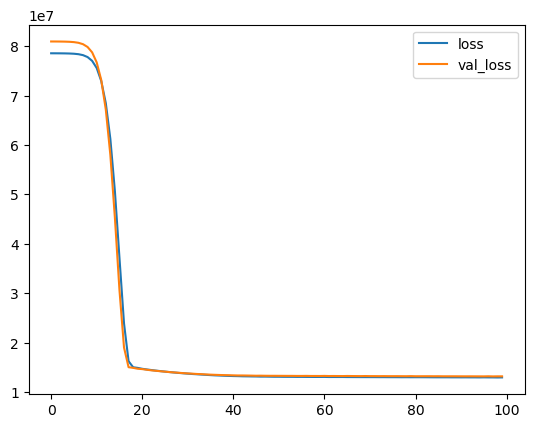

In [956]:
kayipVerisi.plot()

In [957]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [958]:
tahminDizisi = model.predict(x_test)

52/52 [==============================] - 0s 1ms/step


In [959]:
tahminDizisi

array([[11598.114 ],
       [10087.103 ],
       [ 6056.5513],
       ...,
       [ 7593.6343],
       [ 9514.61  ],
       [ 7471.698 ]], dtype=float32)

In [960]:
mean_absolute_error(y_test,tahminDizisi)

2734.115830304126

In [961]:
dataFrame.describe()

,fiyat,m2_brut,bulundugu_kat,oda,bina_yasi,banyo_sayisi,salon
count,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.00000,5474.000000
mean,7879.541834,107.837779,4.131166,2.163866,14.755206,1.28133,0.986664
std,4143.139929,41.582122,4.632085,0.874713,10.209499,0.49273,0.241057
min,0.000000,20.000000,-1.000000,1.000000,5.000000,1.00000,0.000000
25%,4900.000000,80.000000,1.000000,2.000000,5.000000,1.00000,1.000000
50%,6750.000000,100.000000,3.000000,2.000000,10.000000,1.00000,1.000000
75%,10000.000000,130.000000,5.000000,3.000000,25.000000,2.00000,1.000000
max,20000.000000,460.000000,31.000000,7.000000,35.000000,6.00000,4.000000


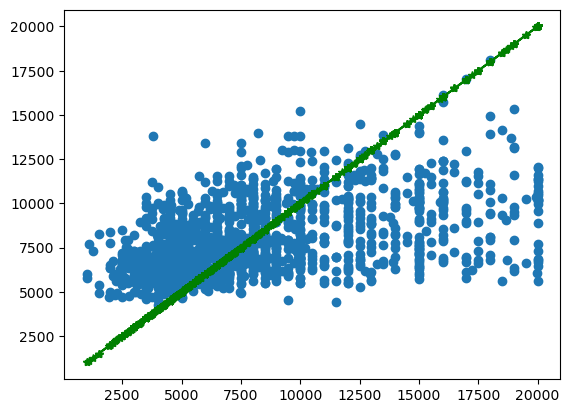

In [962]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

For testing  model:
- Pull any house from the dataframe. 

- Delete the rent from the data.

- Predict it to our model.

In [963]:
dataFrame.iloc[7]

fiyat            8000.0
m2_brut           160.0
bulundugu_kat       3.0
oda                 3.0
bina_yasi          25.0
banyo_sayisi        1.0
salon               1.0
Name: 7, dtype: float64

In [964]:
newHouseSeries = dataFrame.drop("fiyat",axis=1).iloc[7]

In [965]:
newHouseSeries = scaler.transform(newHouseSeries.values.reshape(-1,6))

In [966]:
model.predict(newHouseSeries)

1/1 [==============================] - 0s 20ms/step


array([[8430.481]], dtype=float32)

8000.0 / 8343.475
- It's a 350 tl change. This seems like a good prediction for us.

# Add new column and find rent value

We will like a house for rent in İstanbul and we want to estimate the rent of a house that we have in mind and that meets the appropriate criteria.


In [1237]:
dataFrame.columns

Index(['fiyat', 'm2_brut', 'bulundugu_kat', 'oda', 'bina_yasi', 'banyo_sayisi',
       'salon'],
      dtype='object')

In [1239]:
dataFrame.loc[len(df.index)] = [0,90,2,2,10,1,1]
#dataFrame.drop(dataFrame.index[-1], inplace=True) # drop last value
dataFrame

,fiyat,m2_brut,bulundugu_kat,oda,bina_yasi,banyo_sayisi,salon
0,7000.0,45.0,19,1.0,5,1,0.0
1,17500.0,100.0,15,2.0,5,1,1.0
2,8250.0,135.0,3,3.0,5,2,1.0
3,10000.0,120.0,3,3.0,5,2,1.0
4,6750.0,99.0,4,2.0,10,1,1.0
...,...,...,...,...,...,...,...
5467,5000.0,55.0,0,1.0,25,1,1.0
5468,5600.0,100.0,3,3.0,10,1,1.0
5469,2700.0,92.0,3,2.0,5,1,1.0
5470,6000.0,75.0,1,2.0,5,1,1.0


In [1248]:
dataFrame.iloc[-1]

fiyat             0.0
m2_brut          90.0
bulundugu_kat     2.0
oda               2.0
bina_yasi        10.0
banyo_sayisi      1.0
salon             1.0
Name: 5472, dtype: float64

In [1252]:
# drop the price  value of  last row
addedHouse = dataFrame.drop("fiyat",axis=1).iloc[-1] 

In [1253]:
addedHouse = scaler.transform(addedHouse.values.reshape(-1,6))

In [1254]:
model.predict(addedHouse)

1/1 [==============================] - 0s 31ms/step


array([[11673.1455]], dtype=float32)

# Kadıköy

In [1028]:
kadiköy_df = df[df["ilce"]=="Kadıköy"]

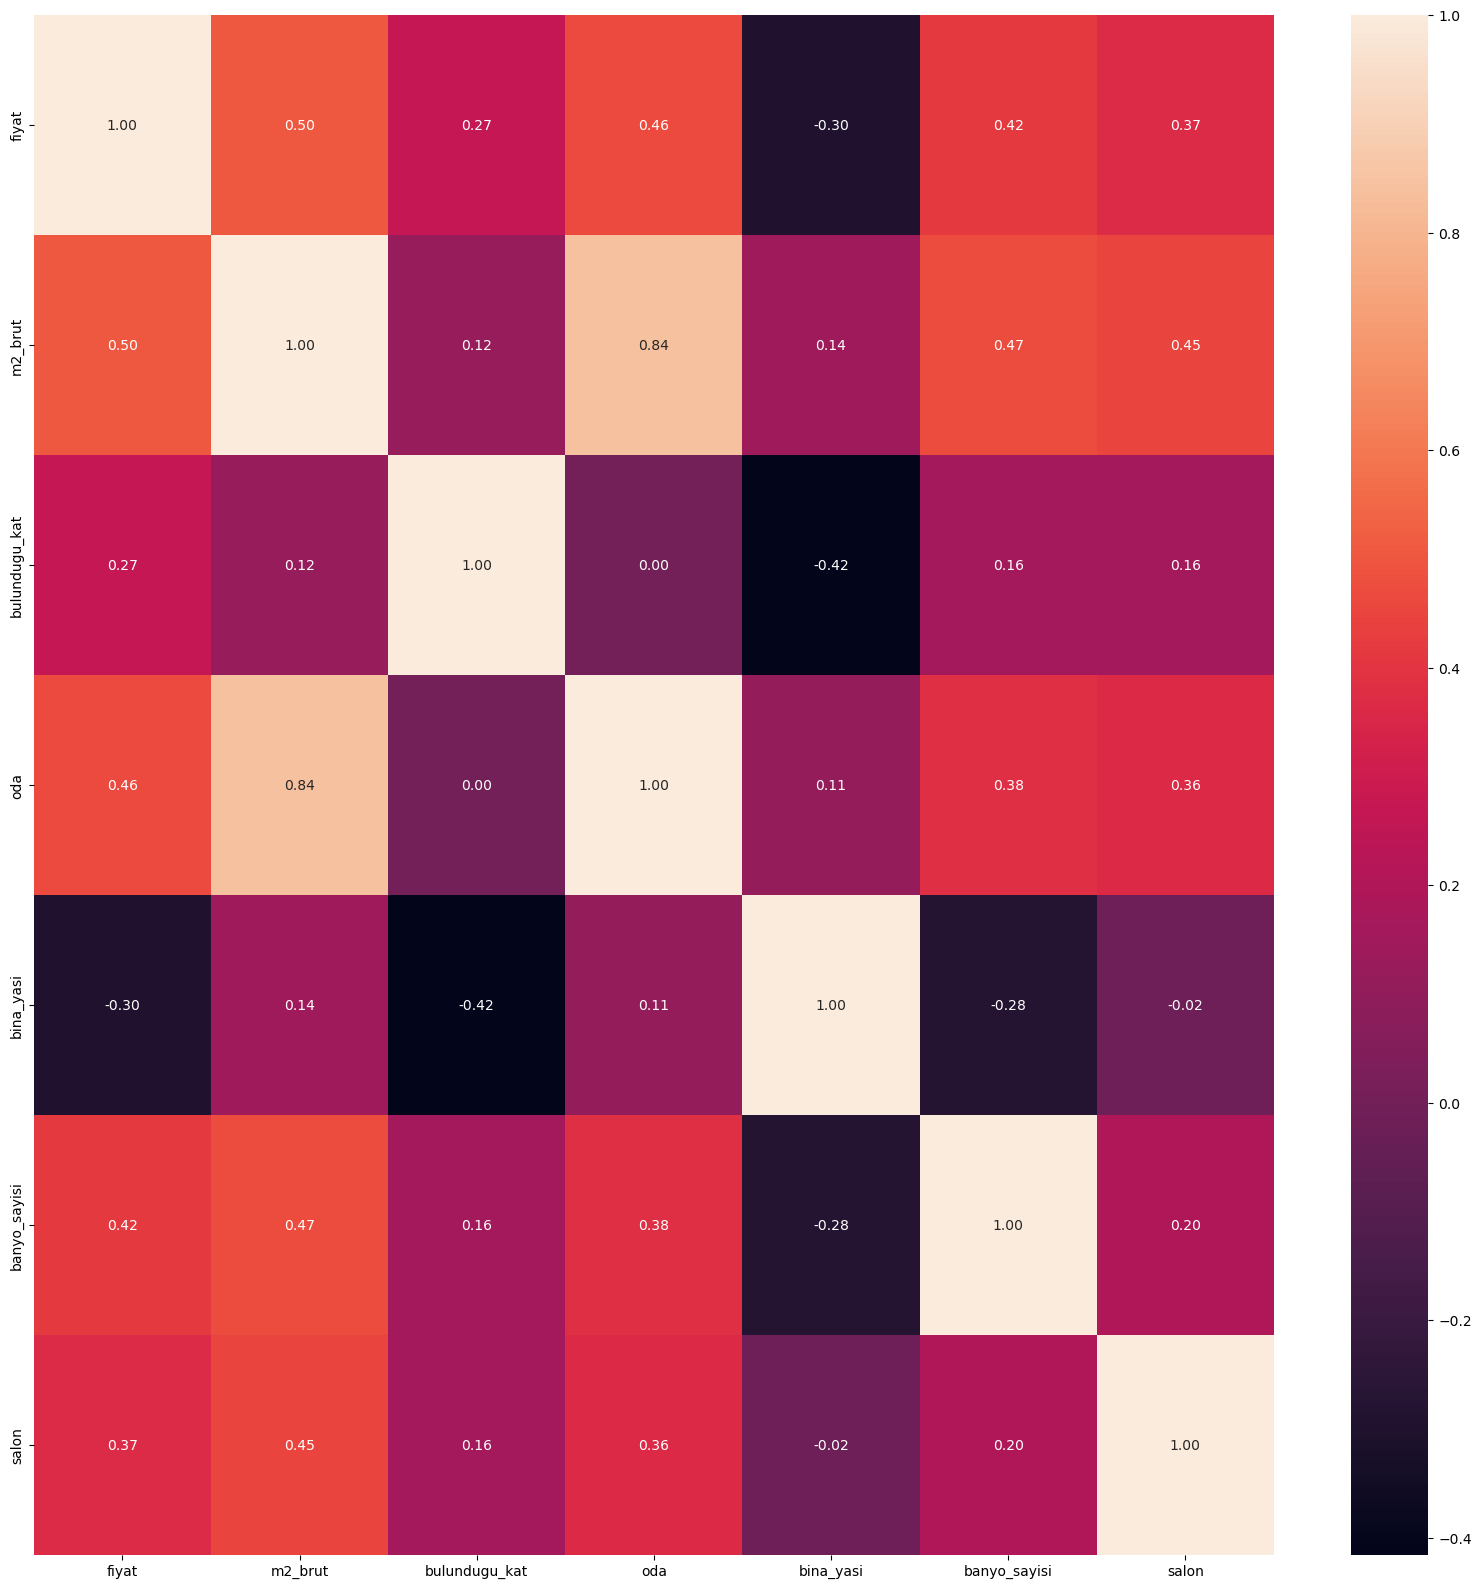

In [917]:
#Correlation between all Features
plt.figure(figsize=(20,20))
sbn.heatmap(kadiköy_df.corr(),annot=True,fmt='.2f')
plt.show()

<AxesSubplot:title={'center':'Correlation with Reposnse Variable'}>

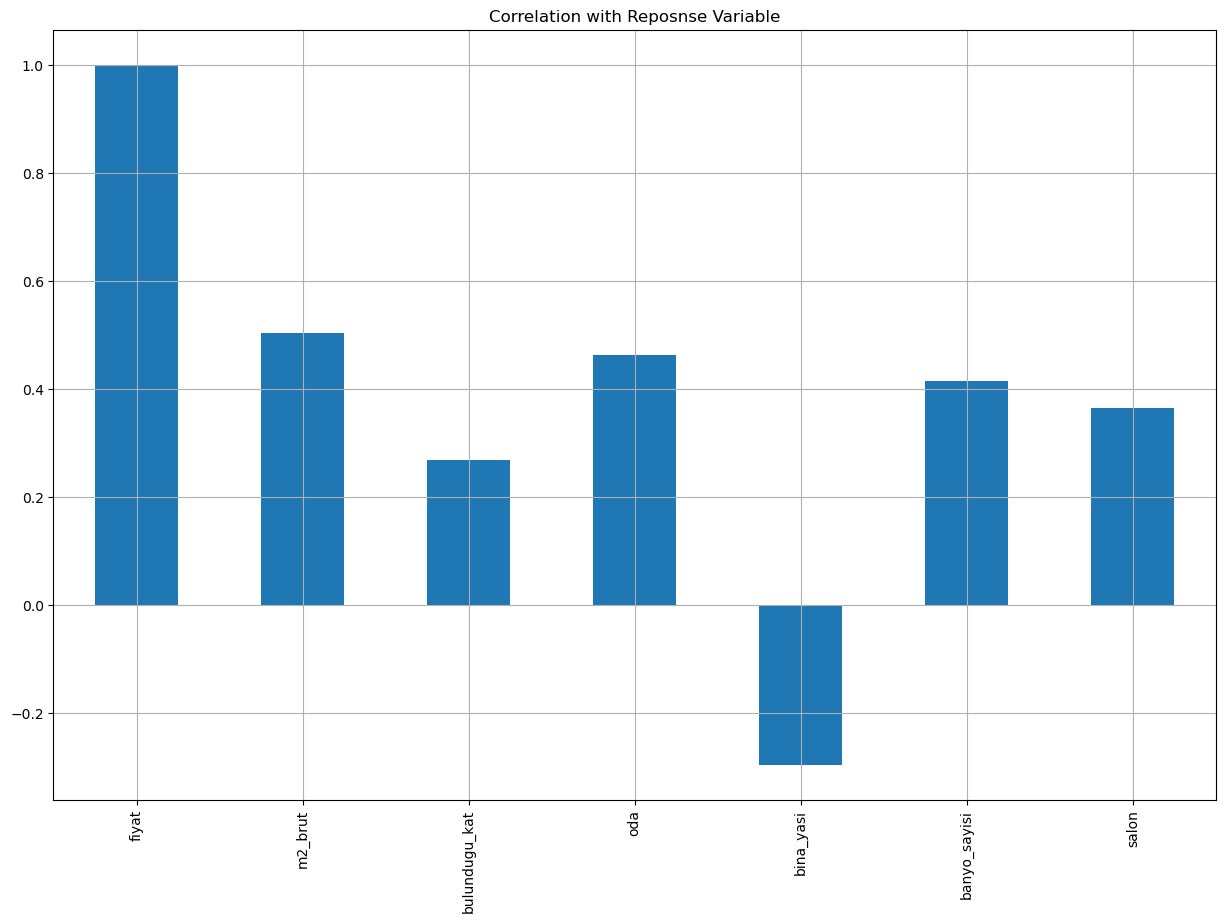

In [918]:
kadiköy_df.corrwith(kadiköy_df.fiyat).plot.bar(figsize=(15, 10),
                  title = 'Correlation with Reposnse Variable',
                  fontsize = 10, rot = 90,
                  grid = True)

# Modeling for Kadıköy

In [1208]:
kadiköy_df =pd.DataFrame(kadiköy_df, columns=["fiyat","m2_brut","bulundugu_kat","oda","bina_yasi","banyo_sayisi","salon"])

In [1209]:
y = kadiköy_df["fiyat"].values
x = kadiköy_df.drop("fiyat",axis=1).values

In [1210]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [1211]:
len(x_train)

183

In [1212]:
len(x_test)

46

In [1213]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [1214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [1215]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [1216]:
model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=50,epochs=800)

Epoch 1/800
4/4 [==============================] - 1s 93ms/step - loss: 176505120.0000 - val_loss: 171375280.0000
Epoch 2/800
4/4 [==============================] - 0s 17ms/step - loss: 176503920.0000 - val_loss: 171374000.0000
Epoch 3/800
4/4 [==============================] - 0s 28ms/step - loss: 176502560.0000 - val_loss: 171372560.0000
Epoch 4/800
4/4 [==============================] - 0s 19ms/step - loss: 176501024.0000 - val_loss: 171370880.0000
Epoch 5/800
4/4 [==============================] - 0s 17ms/step - loss: 176499232.0000 - val_loss: 171368944.0000
Epoch 6/800
4/4 [==============================] - 0s 17ms/step - loss: 176497152.0000 - val_loss: 171366608.0000
Epoch 7/800
4/4 [==============================] - 0s 14ms/step - loss: 176494672.0000 - val_loss: 171363856.0000
Epoch 8/800
4/4 [==============================] - 0s 22ms/step - loss: 176491712.0000 - val_loss: 171360608.0000
Epoch 9/800
4/4 [==============================] - 0s 24ms/step - loss: 176488208.0000 -

4/4 [==============================] - 0s 15ms/step - loss: 30181488.0000 - val_loss: 27267314.0000
Epoch 73/800
4/4 [==============================] - 0s 19ms/step - loss: 25547698.0000 - val_loss: 23642448.0000
Epoch 74/800
4/4 [==============================] - 0s 29ms/step - loss: 22178342.0000 - val_loss: 20777126.0000
Epoch 75/800
4/4 [==============================] - 0s 18ms/step - loss: 19419822.0000 - val_loss: 18699212.0000
Epoch 76/800
4/4 [==============================] - 0s 24ms/step - loss: 17459184.0000 - val_loss: 17303080.0000
Epoch 77/800
4/4 [==============================] - 0s 26ms/step - loss: 16240170.0000 - val_loss: 16439183.0000
Epoch 78/800
4/4 [==============================] - 0s 23ms/step - loss: 15406792.0000 - val_loss: 15981107.0000
Epoch 79/800
4/4 [==============================] - 0s 17ms/step - loss: 15100374.0000 - val_loss: 15760746.0000
Epoch 80/800
4/4 [==============================] - 0s 18ms/step - loss: 14857935.0000 - val_loss: 15677434.0

4/4 [==============================] - 0s 35ms/step - loss: 12732566.0000 - val_loss: 13268704.0000
Epoch 145/800
4/4 [==============================] - 0s 24ms/step - loss: 12723971.0000 - val_loss: 13245786.0000
Epoch 146/800
4/4 [==============================] - 0s 19ms/step - loss: 12687063.0000 - val_loss: 13219901.0000
Epoch 147/800
4/4 [==============================] - 0s 16ms/step - loss: 12664677.0000 - val_loss: 13194915.0000
Epoch 148/800
4/4 [==============================] - 0s 17ms/step - loss: 12640764.0000 - val_loss: 13171509.0000
Epoch 149/800
4/4 [==============================] - 0s 22ms/step - loss: 12622279.0000 - val_loss: 13146674.0000
Epoch 150/800
4/4 [==============================] - 0s 22ms/step - loss: 12602351.0000 - val_loss: 13122813.0000
Epoch 151/800
4/4 [==============================] - 0s 20ms/step - loss: 12577514.0000 - val_loss: 13099363.0000
Epoch 152/800
4/4 [==============================] - 0s 20ms/step - loss: 12557957.0000 - val_loss: 13

Epoch 216/800
4/4 [==============================] - 0s 19ms/step - loss: 11670473.0000 - val_loss: 12030361.0000
Epoch 217/800
4/4 [==============================] - 0s 16ms/step - loss: 11655602.0000 - val_loss: 12020861.0000
Epoch 218/800
4/4 [==============================] - 0s 17ms/step - loss: 11651805.0000 - val_loss: 12008529.0000
Epoch 219/800
4/4 [==============================] - 0s 17ms/step - loss: 11636937.0000 - val_loss: 12000013.0000
Epoch 220/800
4/4 [==============================] - 0s 17ms/step - loss: 11632370.0000 - val_loss: 11989192.0000
Epoch 221/800
4/4 [==============================] - 0s 16ms/step - loss: 11618879.0000 - val_loss: 11979096.0000
Epoch 222/800
4/4 [==============================] - 0s 22ms/step - loss: 11622211.0000 - val_loss: 11971019.0000
Epoch 223/800
4/4 [==============================] - 0s 18ms/step - loss: 11615543.0000 - val_loss: 11953896.0000
Epoch 224/800
4/4 [==============================] - 0s 16ms/step - loss: 11593143.0000 

Epoch 288/800
4/4 [==============================] - 0s 22ms/step - loss: 11216407.0000 - val_loss: 11425040.0000
Epoch 289/800
4/4 [==============================] - 0s 20ms/step - loss: 11205972.0000 - val_loss: 11417877.0000
Epoch 290/800
4/4 [==============================] - 0s 24ms/step - loss: 11206761.0000 - val_loss: 11411177.0000
Epoch 291/800
4/4 [==============================] - 0s 23ms/step - loss: 11203753.0000 - val_loss: 11404971.0000
Epoch 292/800
4/4 [==============================] - 0s 19ms/step - loss: 11191675.0000 - val_loss: 11399638.0000
Epoch 293/800
4/4 [==============================] - 0s 18ms/step - loss: 11190804.0000 - val_loss: 11397530.0000
Epoch 294/800
4/4 [==============================] - 0s 17ms/step - loss: 11185032.0000 - val_loss: 11395686.0000
Epoch 295/800
4/4 [==============================] - 0s 19ms/step - loss: 11190484.0000 - val_loss: 11394968.0000
Epoch 296/800
4/4 [==============================] - 0s 16ms/step - loss: 11181853.0000 

Epoch 360/800
4/4 [==============================] - 0s 21ms/step - loss: 10976449.0000 - val_loss: 11043593.0000
Epoch 361/800
4/4 [==============================] - 0s 31ms/step - loss: 10978892.0000 - val_loss: 11043856.0000
Epoch 362/800
4/4 [==============================] - 0s 20ms/step - loss: 10971985.0000 - val_loss: 11042151.0000
Epoch 363/800
4/4 [==============================] - 0s 28ms/step - loss: 10969380.0000 - val_loss: 11036095.0000
Epoch 364/800
4/4 [==============================] - 0s 27ms/step - loss: 10967191.0000 - val_loss: 11029367.0000
Epoch 365/800
4/4 [==============================] - 0s 22ms/step - loss: 10971727.0000 - val_loss: 11027437.0000
Epoch 366/800
4/4 [==============================] - 0s 26ms/step - loss: 10968310.0000 - val_loss: 11017514.0000
Epoch 367/800
4/4 [==============================] - 0s 21ms/step - loss: 10964501.0000 - val_loss: 11011606.0000
Epoch 368/800
4/4 [==============================] - 0s 23ms/step - loss: 10965605.0000 

Epoch 432/800
4/4 [==============================] - 0s 25ms/step - loss: 10833302.0000 - val_loss: 10773050.0000
Epoch 433/800
4/4 [==============================] - 0s 23ms/step - loss: 10833593.0000 - val_loss: 10769252.0000
Epoch 434/800
4/4 [==============================] - 0s 22ms/step - loss: 10839826.0000 - val_loss: 10771918.0000
Epoch 435/800
4/4 [==============================] - 0s 19ms/step - loss: 10835393.0000 - val_loss: 10769692.0000
Epoch 436/800
4/4 [==============================] - 0s 26ms/step - loss: 10836372.0000 - val_loss: 10768064.0000
Epoch 437/800
4/4 [==============================] - 0s 18ms/step - loss: 10830388.0000 - val_loss: 10760213.0000
Epoch 438/800
4/4 [==============================] - 0s 18ms/step - loss: 10826135.0000 - val_loss: 10754463.0000
Epoch 439/800
4/4 [==============================] - 0s 19ms/step - loss: 10828638.0000 - val_loss: 10752006.0000
Epoch 440/800
4/4 [==============================] - 0s 27ms/step - loss: 10825863.0000 

Epoch 504/800
4/4 [==============================] - 0s 16ms/step - loss: 10758302.0000 - val_loss: 10567955.0000
Epoch 505/800
4/4 [==============================] - 0s 21ms/step - loss: 10765014.0000 - val_loss: 10576765.0000
Epoch 506/800
4/4 [==============================] - 0s 19ms/step - loss: 10748087.0000 - val_loss: 10575111.0000
Epoch 507/800
4/4 [==============================] - 0s 22ms/step - loss: 10744168.0000 - val_loss: 10578081.0000
Epoch 508/800
4/4 [==============================] - 0s 19ms/step - loss: 10749516.0000 - val_loss: 10583191.0000
Epoch 509/800
4/4 [==============================] - 0s 15ms/step - loss: 10746576.0000 - val_loss: 10577330.0000
Epoch 510/800
4/4 [==============================] - 0s 16ms/step - loss: 10755258.0000 - val_loss: 10564888.0000
Epoch 511/800
4/4 [==============================] - 0s 17ms/step - loss: 10745387.0000 - val_loss: 10563592.0000
Epoch 512/800
4/4 [==============================] - 0s 16ms/step - loss: 10753028.0000 

Epoch 576/800
4/4 [==============================] - 0s 18ms/step - loss: 10704886.0000 - val_loss: 10442698.0000
Epoch 577/800
4/4 [==============================] - 0s 26ms/step - loss: 10700821.0000 - val_loss: 10443917.0000
Epoch 578/800
4/4 [==============================] - 0s 23ms/step - loss: 10700746.0000 - val_loss: 10443752.0000
Epoch 579/800
4/4 [==============================] - 0s 20ms/step - loss: 10700155.0000 - val_loss: 10444022.0000
Epoch 580/800
4/4 [==============================] - 0s 27ms/step - loss: 10700150.0000 - val_loss: 10452647.0000
Epoch 581/800
4/4 [==============================] - 0s 18ms/step - loss: 10711676.0000 - val_loss: 10464404.0000
Epoch 582/800
4/4 [==============================] - 0s 17ms/step - loss: 10704969.0000 - val_loss: 10455157.0000
Epoch 583/800
4/4 [==============================] - 0s 17ms/step - loss: 10699121.0000 - val_loss: 10448344.0000
Epoch 584/800
4/4 [==============================] - 0s 17ms/step - loss: 10700158.0000 

Epoch 648/800
4/4 [==============================] - 0s 19ms/step - loss: 10674126.0000 - val_loss: 10366609.0000
Epoch 649/800
4/4 [==============================] - 0s 28ms/step - loss: 10678536.0000 - val_loss: 10376430.0000
Epoch 650/800
4/4 [==============================] - 0s 24ms/step - loss: 10692076.0000 - val_loss: 10384122.0000
Epoch 651/800
4/4 [==============================] - 0s 19ms/step - loss: 10677617.0000 - val_loss: 10369916.0000
Epoch 652/800
4/4 [==============================] - 0s 22ms/step - loss: 10674368.0000 - val_loss: 10361773.0000
Epoch 653/800
4/4 [==============================] - 0s 20ms/step - loss: 10675772.0000 - val_loss: 10353848.0000
Epoch 654/800
4/4 [==============================] - 0s 20ms/step - loss: 10682604.0000 - val_loss: 10348602.0000
Epoch 655/800
4/4 [==============================] - 0s 27ms/step - loss: 10697238.0000 - val_loss: 10360076.0000
Epoch 656/800
4/4 [==============================] - 0s 24ms/step - loss: 10683128.0000 

Epoch 720/800
4/4 [==============================] - 0s 20ms/step - loss: 10677871.0000 - val_loss: 10301332.0000
Epoch 721/800
4/4 [==============================] - 0s 25ms/step - loss: 10663030.0000 - val_loss: 10303768.0000
Epoch 722/800
4/4 [==============================] - 0s 18ms/step - loss: 10662975.0000 - val_loss: 10312813.0000
Epoch 723/800
4/4 [==============================] - 0s 15ms/step - loss: 10669095.0000 - val_loss: 10324552.0000
Epoch 724/800
4/4 [==============================] - 0s 17ms/step - loss: 10670420.0000 - val_loss: 10316732.0000
Epoch 725/800
4/4 [==============================] - 0s 29ms/step - loss: 10664315.0000 - val_loss: 10313042.0000
Epoch 726/800
4/4 [==============================] - 0s 22ms/step - loss: 10664475.0000 - val_loss: 10317181.0000
Epoch 727/800
4/4 [==============================] - 0s 17ms/step - loss: 10666550.0000 - val_loss: 10310783.0000
Epoch 728/800
4/4 [==============================] - 0s 17ms/step - loss: 10671150.0000 

Epoch 792/800
4/4 [==============================] - 0s 14ms/step - loss: 10660108.0000 - val_loss: 10279913.0000
Epoch 793/800
4/4 [==============================] - 0s 16ms/step - loss: 10661093.0000 - val_loss: 10276348.0000
Epoch 794/800
4/4 [==============================] - 0s 18ms/step - loss: 10668568.0000 - val_loss: 10286516.0000
Epoch 795/800
4/4 [==============================] - 0s 27ms/step - loss: 10663276.0000 - val_loss: 10289888.0000
Epoch 796/800
4/4 [==============================] - 0s 18ms/step - loss: 10657483.0000 - val_loss: 10286547.0000
Epoch 797/800
4/4 [==============================] - 0s 21ms/step - loss: 10658338.0000 - val_loss: 10277486.0000
Epoch 798/800
4/4 [==============================] - 0s 25ms/step - loss: 10667267.0000 - val_loss: 10270939.0000
Epoch 799/800
4/4 [==============================] - 0s 19ms/step - loss: 10658567.0000 - val_loss: 10275637.0000
Epoch 800/800
4/4 [==============================] - 0s 17ms/step - loss: 10659173.0000 

In [1217]:
kayipVerisi = pd.DataFrame(model.history.history)

In [1218]:
kayipVerisi.head()

,loss,val_loss
0,176505120.0,171375280.0
1,176503920.0,171374000.0
2,176502560.0,171372560.0
3,176501024.0,171370880.0
4,176499232.0,171368944.0


<AxesSubplot:>

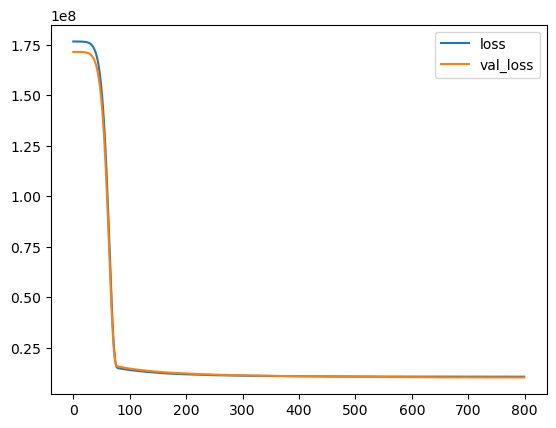

In [1219]:
kayipVerisi.plot()

In [1228]:
kadiköy_df.iloc[7]

fiyat            9000.0
m2_brut            90.0
bulundugu_kat       1.0
oda                 2.0
bina_yasi          35.0
banyo_sayisi        1.0
salon               1.0
Name: 56, dtype: float64

In [1229]:
newHouse = kadiköy_df.drop("fiyat",axis=1).iloc[7]


In [1230]:
newHouse = scaler.transform(newHouse.values.reshape(-1,6))

In [1231]:
model.predict(newHouse)

1/1 [==============================] - 0s 36ms/step


array([[9476.813]], dtype=float32)


- Prediction result

real value: 9000.0 / predicted value: 9476.813